# The Lion, the Witch and the Wardrobe
### Book analysis and insight gathering using NLP

### Dhruv Panchal



<img src="title.jpg" width=700 />


In [310]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import nltk
import fileinput
import nltk, re
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image


#### Import the book as a text file

In [311]:
dataset = open("Book1.txt", "r").read()

In [ ]:
dataset

#### We can see the data contains lot of unnecessary special characters, we will remove those using regex 

In [ ]:
import re
regex = re.compile('[^a-zA-Z]')
data1 = regex.sub(' ', dataset)
data1

The data is now clean and contains only characters, this is what we want!

We now move on to lemmatise the data into its base form

In [314]:
from nltk.tokenize import sent_tokenize
paragraphs = sent_tokenize(dataset)

paragraphs

In [ ]:
lemmatizer = WordNetLemmatizer()

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(data1)

# Lemmatize list of words and join
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
lemmatized_output

All the derived words have been brought to their base words and we can not proceed further!

In [316]:
file = open("testfile.txt", "w")
file.write(lemmatized_output) 
file.close()

# Variability
‘The Lion, the Witch and the Wardrobe’ has a volume of close to 40K words. Lewis used 3000 different distinct words to tell his story in the first book, leading to a variability of around 8%. Variability is in this case calculated as the distinct words divided by the total words in the text, also known as Type-Text Ratio (TTR). It is one of many different measures of the complexity of the text, the richness of the vocabulary and to what degree repetitions are avoided

In [ ]:
split = data1.split()
split
#we take the data and split it into words

In [318]:
setl = len(set(split))
lens = len(split)
#we create a list of unique words from the data
#We find the length of the dataset and the unique word list

In [319]:
setl

3639

In [320]:
setl/lens *100

9.451702553180438

## Word clouds

In [321]:
dataset = open("Book1b.txt", "r").read()

def create_word_cloud(string):
   maskArray = np.array(Image.open("lion.png"))
   cloud = WordCloud(background_color = "white", max_words = 1000, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
    
dataset = dataset.lower()
create_word_cloud(dataset)

## Removing stop words and tokenising

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(data1) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
        
#print(word_tokens)
print(filtered_sentence)

In [323]:
#filtered_sentence

In [324]:
len(filtered_sentence)

19526

We have now reduced the length of the book by nearly 50% by removing filler words

In [325]:
counter = Counter(filtered_sentence)
counter.most_common(10)

[('said', 535),
 ('I', 408),
 ('And', 247),
 ('Lucy', 216),
 ('Edmund', 190),
 ('Aslan', 161),
 ('But', 154),
 ('Peter', 146),
 ('Beaver', 136),
 ('It', 131)]

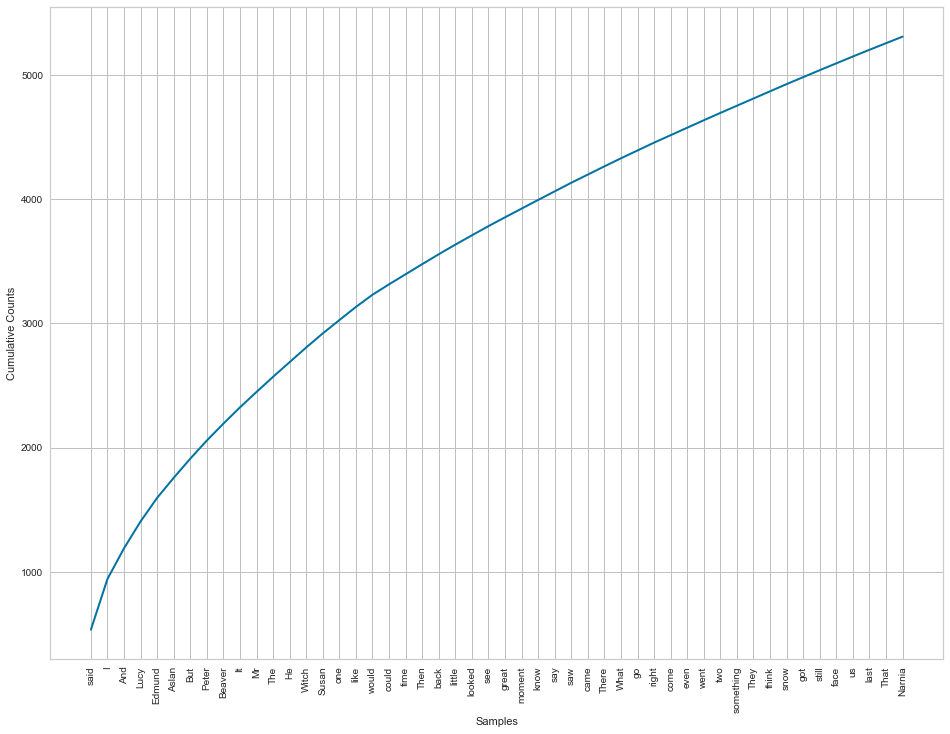

In [326]:
fdist = nltk.FreqDist(filtered_sentence)
fig, ax = plt.subplots(figsize=(16,12))
ax = fdist.plot( 50,cumulative=True)

From the graph we observe that nearly 2% of lemmatised words make up nearly 18% of the whole book

counter = Counter(word_tokens)
counter.most_common()

### Finding the main characters from the text

In [327]:
from nltk.tag import pos_tag
tagged_sent = pos_tag(filtered_sentence)
propernouns = [word for word,pos in tagged_sent if pos == 'NNP']

We use Part of Speech tagger to find out the proper nouns in the book.

In [336]:
propernouns
counter = Counter(propernouns)
counter = counter.most_common()

In [ ]:
propernouns

In [330]:
import pandas as pd
df_names = pd.DataFrame(counter[:10],columns=['words', 'count'])
df_names =df_names.drop([5])

In [331]:
df_names

,words,count
0,Lucy,216
1,Edmund,183
2,Aslan,159
3,Peter,146
4,Beaver,134
6,Susan,113
7,Witch,112
8,Narnia,53
9,Faun,49


We have created a dataframe of the main charaters based on their occourances in the text and added a counter next to them

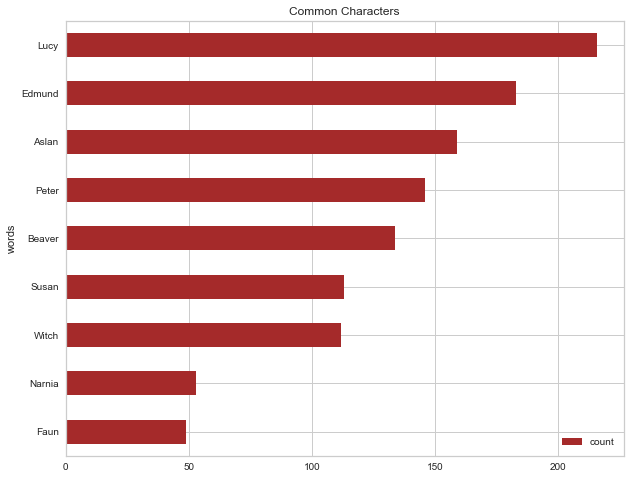

In [332]:
fig, ax = plt.subplots(figsize=(10,8))
df_names.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="BROWN")
ax.set_title("Common Characters")
plt.show()

#### We can see from this who all are major characters in the book and who the story revolves around

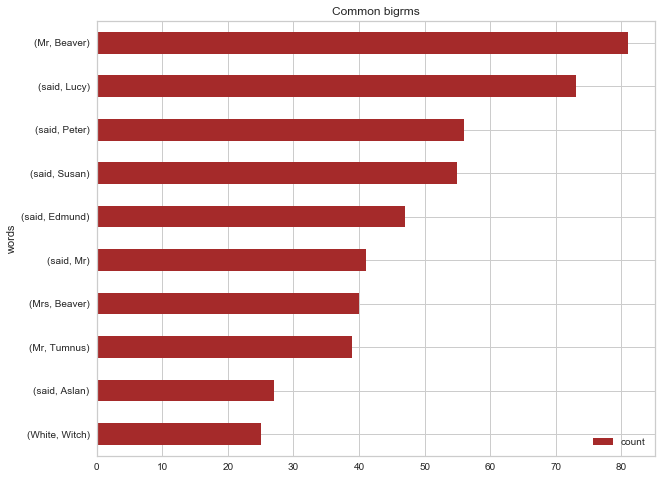

In [333]:
bigrm = list(nltk.bigrams(filtered_sentence))
counter_bigrm = Counter(bigrm)
counter_bigrm =counter_bigrm.most_common()
counter_bigrm[:15]
df_bigrm = pd.DataFrame(counter_bigrm[:10],columns=['words', 'count'])
df_bigrm
fig, ax = plt.subplots(figsize=(10, 8))
df_bigrm.sort_values(by='count').plot.barh(x='words',y='count',ax=ax, color="BROWN")
ax.set_title("Common bigrms")
plt.show()

#### from this plot we can see distribution of dialogues

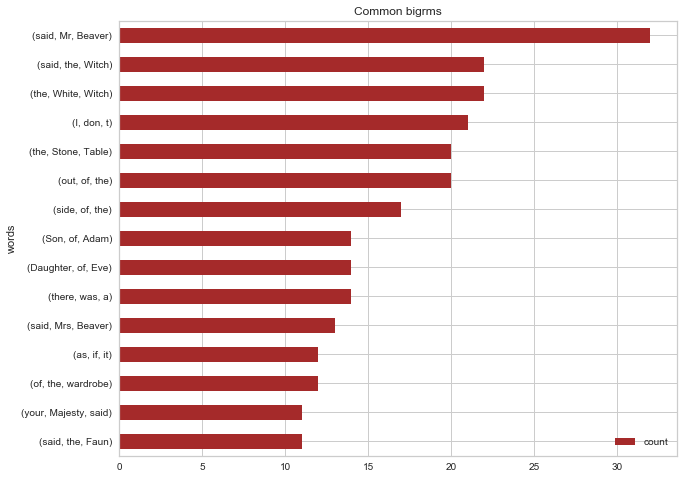

In [334]:
trigm = list(nltk.trigrams(word_tokens))
counter_trigm = Counter(trigm)
counter_trigm =counter_trigm.most_common()
counter_trigm[:15]
df_trigm = pd.DataFrame(counter_trigm[:15],columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(10, 8))
df_trigm.sort_values(by='count').plot.barh(x='words',y='count',ax=ax, color="BROWN")
ax.set_title("Common bigrms")
plt.show()

The above plot tells us about some terms in the book that were previosuly unknown

 !pip3 install --user yellowbrick

### Plotting character footprints

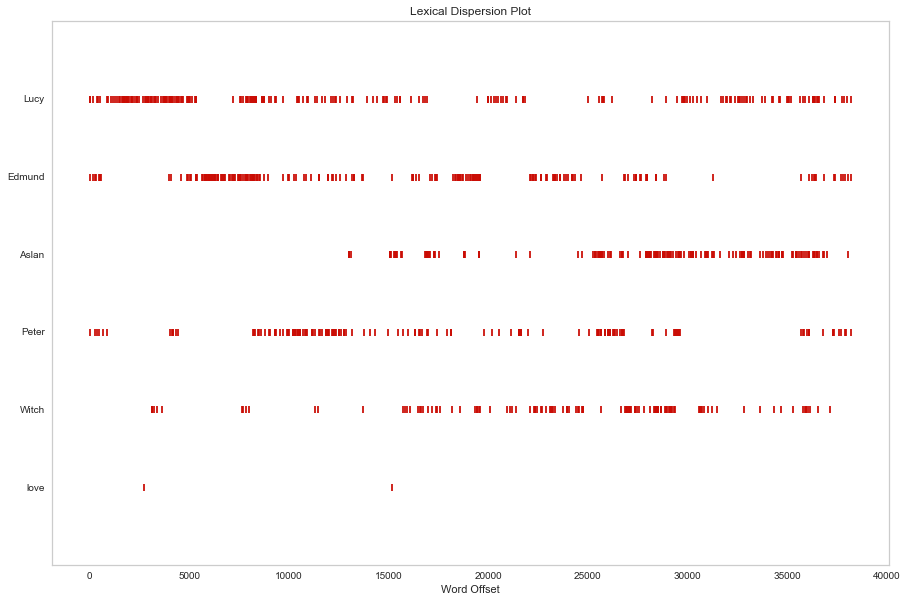

In [350]:
from yellowbrick.text import DispersionPlot
corpus = word_tokens
text = [doc.split() for doc in corpus]
target_words = ['Lucy', 'Edmund', 'Aslan', 'Peter', 'Witch','love']
target_words1 = ['like','Narnia']


visualizer = DispersionPlot(target_words, color='red')
fig, ax = plt.subplots(figsize=(15, 10))
visualizer.fit(text)
visualizer.show()

From the above graph we can see which character is played in what part of the story.
